In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cufflinks

  Using cached plotly-5.9.0-py2.py3-none-any.whl (15.2 MB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=8403735df9fd120454792be23aedf11a217131261473fbe438754774f25783d8
  Stored in directory: c:\users\ronny\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks
  Attempting uninstall: plotly
    Found existing installation: plotly 2.7.0
    Uninstalling plotly-2.7.0:
      Successfully uninstalled plotly-2.7.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing required libraries
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import pandas as pd
import numpy as np

In [6]:
time_series_df=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\New data2\Range 46 for 5 bar.xlsx')
time_series_df.columns = ['load_date','actuals']
time_series_df2=time_series_df
time_series_df.tail()

,load_date,actuals
2739,13:59:54,5.015
2740,13:59:55,5.014
2741,13:59:58,5.014
2742,13:59:59,5.016
2743,14:00:00,5.015


In [7]:
actual_vals = time_series_df.actuals.values
actual_log = np.log10(actual_vals)

In [8]:
'''from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(time_series_df['actuals'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()'''

'from pmdarima import auto_arima\n  \n# Ignore harmless warnings\nimport warnings\nwarnings.filterwarnings("ignore")\n  \n# Fit auto_arima function to AirPassengers dataset\nstepwise_fit = auto_arima(time_series_df[\'actuals\'], start_p = 1, start_q = 1,\n                          max_p = 3, max_q = 3, m = 12,\n                          start_P = 0, seasonal = True,\n                          d = None, D = 1, trace = True,\n                          error_action =\'ignore\',   # we don\'t want to know if an order does not work\n                          suppress_warnings = True,  # we don\'t want convergence warnings\n                          stepwise = True)           # set to stepwise\n  \n# To print the summary\nstepwise_fit.summary()'

In [9]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.tools as tls

# Split data into train / test sets
train = time_series_df.iloc[:len(time_series_df)-1500]
test = time_series_df.iloc[len(time_series_df)-1500:] # set 3000 for testing


my_order = (1,0,3)
my_seasonal_order = (2, 1, 1, 12)


In [10]:
# Fit on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['actuals'], order = my_order, seasonal_order =my_seasonal_order)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              actuals   No. Observations:                 1244
Model:             SARIMAX(1, 0, 3)x(2, 1, [1], 12)   Log Likelihood                5524.243
Date:                              Sat, 16 Jul 2022   AIC                         -11032.485
Time:                                      19:16:34   BIC                         -10991.554
Sample:                                           0   HQIC                        -11017.087
                                             - 1244                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9477      0.005    174.324      0.000       0.937       0.958
ma.L1         -0.2032      0.017    -11.893      0.000      -0.237      -0.170
ma.L2         -0.1135      0.023     -4.976      0.000      -0.158      -0.069
ma.L3         -0.0352      0.036     -0.969      0.332      -0.106       0.036
ar.S.L12       0.0701      0.161      0.436      0.663      -0.245       0.385
ar.S.L24       0.2406      0.102      2.364      0.018       0.041       0.440
ma.S.L12      -0.7020      0.162     -4.326      0.000      -1.020      -0.384
sigma2      7.412e-06   6.87e-08    107.884      0.000    7.28e-06    7.55e-06
===================================================================================
Ljung-Box (L1) (Q):                   9.60   Jarque-Bera (JB):           1225577.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -6.77
Prob(H) (two-sided):                  0.00   Kurtosis:                       156.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

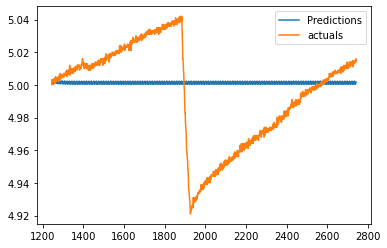

In [11]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['actuals'].plot(legend = True)

<AxesSubplot:>

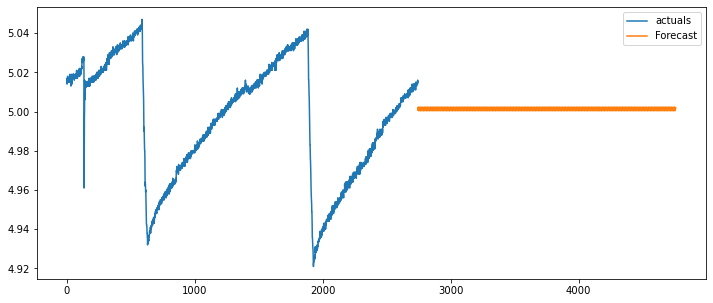

In [12]:
#Predicting using all data

model = model = SARIMAX(time_series_df['actuals'],
                        order = (1,0,3),
                        seasonal_order =(2, 1, 1, 12))

model_fit = model.fit()
  
# Forecast for the next 6000 values
predictions = result.predict(start = len(time_series_df), 
                          end = (len(time_series_df)-1) + 2017, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
time_series_df['actuals'].plot(figsize = (12, 5), legend = True)
predictions.plot(legend = True)

In [13]:
time_series_df_live=pd.read_excel(r'C:\Users\Ronny\Desktop\2022\Ogauge pressure gauge\New data2\Range 4to6 5bar+leak.xls')
time_series_df_live.columns = ['real_time','Live_pressure']
time_series_df_live.head()

,real_time,Live_pressure
0,11:15:58,5.003
1,11:15:59,5.003
2,11:16:00,5.009
3,11:16:01,5.007
4,11:16:02,5.005


In [14]:
predicted=pd.DataFrame()

predicted['load_date']=time_series_df_live['real_time']
predicted['actuals']=time_series_df_live['Live_pressure']
predicted['predicted']=predictions.values

predicted.reset_index(inplace=True)
predicted.head()

,index,load_date,actuals,predicted
0,0,11:15:58,5.003,5.001877
1,1,11:15:59,5.003,5.000633
2,2,11:16:00,5.009,5.001535
3,3,11:16:01,5.007,5.002308
4,4,11:16:02,5.005,5.000814


In [15]:
predicted = predicted.iloc[: , 1:]
predicted.head()

,load_date,actuals,predicted
0,11:15:58,5.003,5.001877
1,11:15:59,5.003,5.000633
2,11:16:00,5.009,5.001535
3,11:16:01,5.007,5.002308
4,11:16:02,5.005,5.000814


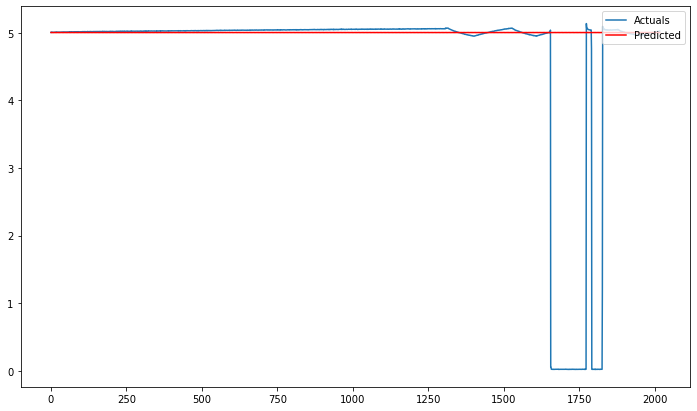

In [16]:
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(predicted['actuals'],label='Actuals')
pyplot.plot(predicted['predicted'], color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [17]:
def detect_classify_anomalies(df,window):
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0,inplace=True)
    df['error']=df['actuals']-df['predicted']
    df['percentage_change'] = ((df['actuals'] - df['predicted']) / df['actuals']) * 100
    df['meanval'] = df['error'].rolling(window=window).mean()
    df['deviation'] = df['error'].rolling(window=window).std()
    df['-3s'] = df['meanval'] - (2 * df['deviation'])
    df['3s'] = df['meanval'] + (2 * df['deviation'])
    df['-2s'] = df['meanval'] - (1.75 * df['deviation'])
    df['2s'] = df['meanval'] + (1.75 * df['deviation'])
    df['-1s'] = df['meanval'] - (1.5 * df['deviation'])
    df['1s'] = df['meanval'] + (1.5 * df['deviation'])
    cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'][x])[1][0])(x) for x in
                               range(len(df['error']))]
    severity = {0: 3, 1: 2, 2: 1, 3: 0, 4: 0, 5: 1, 6: 2, 7: 3}
    region = {0: "NEGATIVE", 1: "NEGATIVE", 2: "NEGATIVE", 3: "NEGATIVE", 4: "POSITIVE", 5: "POSITIVE", 6: "POSITIVE",
              7: "POSITIVE"}
    df['color'] =  df['impact'].map(severity)
    df['region'] = df['impact'].map(region)
    df['anomaly_points'] = np.where(df['color'] == 3, df['error'], np.nan)
    df = df.sort_values(by='load_date', ascending=False)
    #df.load_date = pd.to_datetime(df['load_date'].astype(str), format=format='%H:%M:%S')
    df['load_date'] = pd.to_datetime(df['load_date'],format= '%H:%M:%S' ).dt.time

    return df

In [18]:
def plot_anomaly(df,metric_name):
    #error = pd.DataFrame(Order_results.error.values)
    #df = df.sort_values(by='load_date', ascending=False)
    #df.load_date = pd.to_datetime(df['load_date'].astype(str), format="%Y%m%d")
    dates = df.load_date
    #meanval = error.rolling(window=window).mean()
    #deviation = error.rolling(window=window).std()
    #res = error

    #upper_bond=meanval + (2 * deviation)
    #lower_bond=meanval - (2 * deviation)

    #anomalies = pd.DataFrame(index=res.index, columns=res.columns)
    #anomalies[res < lower_bond] = res[res < lower_bond]
    #anomalies[res > upper_bond] = res[res > upper_bond]
    bool_array = (abs(df['anomaly_points']) > 0)



    #And a subplot of the Actual Values.
    actuals = df["actuals"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan

    #Order_results['meanval']=meanval
    #Order_results['deviation']=deviation

    color_map= {0: "'rgba(228, 222, 249, 0.65)'", 1: "yellow", 2: "orange", 3: "red"}
    table = go.Table(
    domain=dict(x=[0, 1],
                y=[0, 0.3]),
    columnwidth=[1, 2 ],
    #columnorder=[0, 1, 2,],
    header = dict(height = 20,
                  values = [['<b>Date</b>'],['<b>Actual Values </b>'],
                            ['<b>Predicted</b>'], ['<b>% Difference</b>'],['<b>Severity (0-3)</b>']],
                 font = dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                  fill = dict(color='#d562be')),
    cells = dict(values = [df.round(3)[k].tolist() for k in ['load_date', 'actuals', 'predicted',
                                                               'percentage_change','color']],
                 line = dict(color='#506784'),
                 align = ['center'] * 5,
                 font = dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                 #format = [None] + [",.4f"] + [',.4f'],

                 #suffix=[None] * 4,
                 suffix=[None] + [''] + [''] + ['%'] + [''],
                 height = 27,
                 #fill = dict(color=['rgb(235, 193, 238)', 'rgba(228, 222, 249, 0.65)']))
                 fill=dict(color=  # ['rgb(245,245,245)',#unique color for the first column
                      [df['color'].map(color_map)],
                      )
    ))


    #df['ano'] = np.where(df['color']==3, df['error'], np.nan)

    anomalies = go.Scatter(name="Anomaly",
                       x=dates,
                       xaxis='x1',
                       yaxis='y1',
                       y=df['anomaly_points'],
                       mode='markers',
                       marker = dict(color ='red',
                      size = 11,line = dict(
                                         color = "red",
                                         width = 2)))

    upper_bound = go.Scatter(hoverinfo="skip",
                         x=dates,
                         showlegend =False,
                         xaxis='x1',
                         yaxis='y1',
                         y=df['3s'],
                         marker=dict(color="#444"),
                         line=dict(
                             color=('rgb(23, 96, 167)'),
                             width=2,
                             dash='dash'),
                         fillcolor='rgba(68, 68, 68, 0.3)',
                         fill='tonexty')

    lower_bound = go.Scatter(name='Confidence Interval',
                          x=dates,
                         xaxis='x1',
                         yaxis='y1',
                          y=df['-3s'],
                          marker=dict(color="#444"),
                          line=dict(
                              color=('rgb(23, 96, 167)'),
                              width=2,
                              dash='dash'),
                          fillcolor='rgba(68, 68, 68, 0.3)',
                          fill='tonexty')

    Actuals = go.Scatter(name= 'Actuals',
                     x= dates,
                     y= df['actuals'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="blue"))

    Predicted = go.Scatter(name= 'Predicted',
                     x= dates,
                     y= df['predicted'],
                    xaxis='x2', yaxis='y2',
                     mode='line',
                     marker=dict(size=12,
                                 line=dict(width=1),
                                 color="orange"))



    # create plot for error...
    Error = go.Scatter(name="Error",
                   x=dates, y=df['error'],
                   xaxis='x1',
                   yaxis='y1',
                   mode='line',
                   marker=dict(size=12,
                               line=dict(width=1),
                               color="red"),
                   text="Error")



    anomalies_map = go.Scatter(name = "anomaly actual",
                                   showlegend=False,
                                   x=dates,
                                   y=anomaly_points,
                                   mode='markers',
                                   xaxis='x2',
                                   yaxis='y2',
                                    marker = dict(color ="red",
                                  size = 11,
                                 line = dict(
                                     color = "red",
                                     width = 2)))

    Mvingavrg = go.Scatter(name="Moving Average",
                           x=dates,
                           y=df['meanval'],
                           mode='line',
                           xaxis='x1',
                           yaxis='y1',
                           marker=dict(size=12,
                                       line=dict(width=1),
                                       color="green"),
                           text="Moving average")




    axis=dict(
    showline=True,
    zeroline=False,
    showgrid=True,
    mirror=True,
    ticklen=4,
    gridcolor='#ffffff',
    tickfont=dict(size=10))

    layout = dict(
    width=1000,
    height=865,
    autosize=False,
    title= metric_name,
    margin = dict(t=75),
    showlegend=True,
    xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),
    xaxis2=dict(axis, **dict(domain=[0, 1], anchor='y2', showticklabels=True)),
    yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20 + 0.09, 1], anchor='x1', hoverformat='.2f')),
    yaxis2=dict(axis, **dict(domain=[0.21 + 0.12, 2 * 0.31 + 0.02], anchor='x2', hoverformat='.2f')))






    fig = go.Figure(data = [table,anomalies,anomalies_map,
                        upper_bound,lower_bound,Actuals,Predicted,
                        Mvingavrg,Error], layout = layout)

    iplot(fig)
    pyplot.show()


In [20]:
classify_df=detect_classify_anomalies(predicted,7)
classify_df.reset_index(inplace=True)
del classify_df['index']
classify_df.head(10)

,load_date,actuals,predicted,error,percentage_change,meanval,deviation,-3s,3s,-2s,2s,-1s,1s,impact,color,region,anomaly_points
0,11:49:59,5.023,5.001877,0.021123,0.420528,0.018118,0.002003,0.014112,0.022125,0.014612,0.021624,0.015113,0.021123,4,0,POSITIVE,NaN
1,11:49:57,5.021,5.001617,0.019383,0.386039,0.017519,0.001525,0.014469,0.020569,0.014850,0.020188,0.015232,0.019807,3,0,NEGATIVE,NaN
2,11:49:56,5.021,5.001512,0.019488,0.388126,0.016777,0.001719,0.013339,0.020215,0.013768,0.019785,0.014198,0.019355,3,0,NEGATIVE,NaN
3,11:49:55,5.019,5.001335,0.017665,0.351960,0.015377,0.002795,0.009788,0.020967,0.010487,0.020268,0.011185,0.019569,4,0,POSITIVE,NaN
4,11:49:54,5.017,5.001386,0.015614,0.311225,0.014349,0.003119,0.008111,0.020586,0.008891,0.019807,0.009671,0.019027,3,0,NEGATIVE,NaN
5,11:49:53,5.018,5.000354,0.017646,0.351652,0.013885,0.003141,0.007604,0.020166,0.008389,0.019381,0.009174,0.018596,4,0,POSITIVE,NaN
6,11:49:51,5.017,5.001090,0.015910,0.317116,0.012524,0.003298,0.005928,0.019121,0.006752,0.018297,0.007577,0.017472,4,0,POSITIVE,NaN
7,11:49:50,5.018,5.001071,0.016929,0.337359,0.011449,0.003237,0.004975,0.017924,0.005784,0.017114,0.006593,0.016305,4,0,POSITIVE,NaN
8,11:49:49,5.015,5.000814,0.014186,0.282872,0.010243,0.002289,0.005665,0.014822,0.006237,0.014250,0.006810,0.013677,3,0,NEGATIVE,NaN
9,11:49:48,5.012,5.002308,0.009692,0.193383,0.009169,0.001854,0.005461,0.012877,0.005924,0.012413,0.006388,0.011950,3,0,NEGATIVE,NaN


In [21]:
plot_anomaly(classify_df.iloc[:-6,:],"Fault monitoring")